# Анализ друзей страницы Вконтакте

---

Одна из моих последних домашек по программированию была посвящена работе с Pandas и визуализации даных, до этого также была работа с API вк, и я решил, что было бы интересно объединить знания полученные с обоих заданий, а заодно и попрактиковаться в проге.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
plt.rcParams['figure.figsize'] = [8, 6]

In [3]:
data = pd.read_csv('vk_friends.csv')
data.head()

,Name,Id,Sex,Age,Friends age,City,Hometown,Friends count,Groups count,Followers count,Profile photos count,Insta,Twitter,University
0,Митяй Питерский,3823620,M,NaN,29.7,Санкт-Петербург,NaN,1479,460.0,226.0,84,No,No,СПбГУ
1,Вадим Дремлюга,4954753,M,44.8,21.9,Мурманск,NaN,123,NaN,NaN,2,No,No,"МАГУ (бывш. МГГУ, МГПУ)"
2,Николай Лакиза,6404136,M,NaN,39.6,Калининград,NaN,193,NaN,158.0,69,No,No,ПГУПС (МФ)
3,Иван Выборный,9869521,M,NaN,22.4,NaN,NaN,278,187.0,361.0,4,No,No,NaN
4,Денис Легин,11819822,M,18.7,19.3,Санкт-Петербург,NaN,212,209.0,169.0,3,No,No,NaN


### Сколько женщин и сколько мужчин?

In [123]:
data[data['Sex'] == 'M']['Sex'].count()

50

50 мужчин

In [124]:
data[data['Sex'] == 'F']['Sex'].count()

48

48 женщин

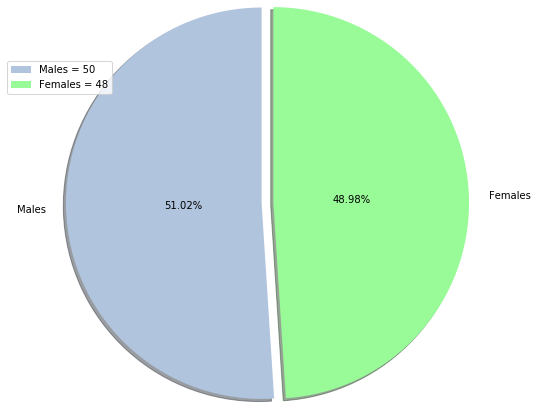

In [281]:
labels = ['Males', 'Females']
labels_n = ['Males = 50', 'Females = 48']
sex = [data[data['Sex'] == 'M']['Sex'].count(), data[data['Sex'] == 'F']['Sex'].count()]

plt.pie(sex, autopct='%.2f%%', radius = 1.5, explode = [0.045, 0.045], colors = ['lightsteelblue', 'palegreen'], \
        pctdistance = 0.4, labels = labels, startangle = 90, shadow = True)
plt.legend(bbox_to_anchor = (-0.16, 0.45, 0.2, 0.5), labels=labels_n);
# Распределение М/Ж

### Сколько друзей у моих друзей?

In [126]:
top_counts = data.sort_values('Friends count', ascending = False)[:10]['Friends count']
top_counts_names = data.sort_values('Friends count', ascending = False)[:10]['Name']

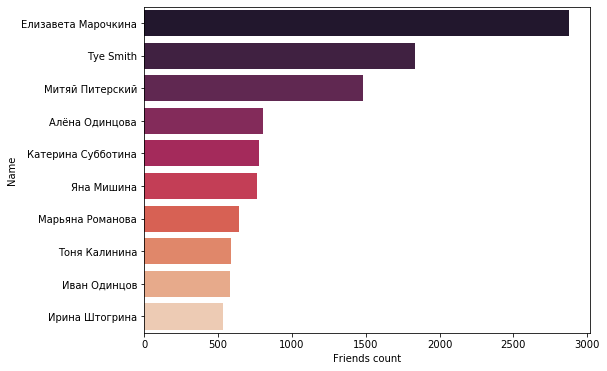

In [280]:
sns.barplot(x = top_counts, y = top_counts_names, palette="rocket", orient="h");
# 10 человек с наибольшим кол-вом друзей

In [128]:
bot_counts = data.sort_values('Friends count', ascending = True)[:10]['Friends count']
bot_counts_names = data.sort_values('Friends count', ascending = True)[:10]['Name']

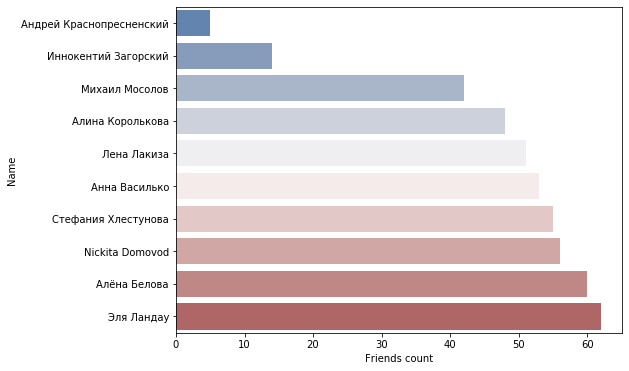

In [282]:
sns.barplot(x = bot_counts, y = bot_counts_names, palette="vlag", orient="h");
# 10 человек с наименьшим кол-вом друзей

С наибольшими и наименьшими значениями разобрались, но каковы средние значения?

In [130]:
round(data['Friends count'].mean(), 1)

266.5

In [131]:
data['Friends count'].median()

180.0

___Среднее арифметическое___ количества друзей моих друзей составляет 266 с половиной друга, а ___медианное___ значение равно 180 друзьям
> Если понятие "среднее арифметическое" всем известно, то "медианное" лично я узнал только в этом учебном году.
Медианой называется значение признака, которое приходится на середину ранжированного ряда и делит его на две равные по количеству единиц части. Медианное значение в большинстве случаев оказывается полезнее, так как чаще даёт более чёткое представление о свойствах ряда.
>>Например, нам дан ряд: [10, 10, 15, 20, 25, 30, 1000], медиана равна 20, в свою очередь, среднее арифметическое равно 159, хотя 1000 здесь скорее всего выброс, и его вляиние на свойства ряда должно быть минимальным.


Обратим внимание на число подписчиков

In [4]:
round(data['Followers count'].mean(), 1)

272.5

In [5]:
round(data['Followers count'].median(), 1)

132.5

___Среднее арифметическое___ числа подписчиков у моих друзей - 272 с половиной человека, а ___медианное___ - 132 с половиной человека

In [43]:
friends_sum_followers = data['Friends count'] + data['Followers count']
df = data[['Name', 'Friends count', 'Followers count']]
df['fr_sum_fo'] = friends_sum_followers
df = df.sort_values('fr_sum_fo', ascending=False)[:5]

d:\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [44]:
friends = df['Friends count']
followers = df['Followers count']
df.loc[38, 'Name'] = 'Е. Марочкина'
df.loc[23, 'Name'] = 'А. Одинцова'

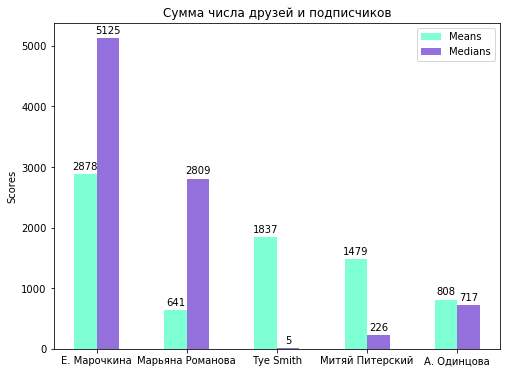

In [49]:
labels = list(df['Name'])

width = 0.25
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, friends, width, label='Means', color = 'aquamarine')
rects2 = ax.bar(x + width/2, followers, width, label='Medians', color = 'mediumpurple')

ax.set_ylabel('Scores')
ax.set_title('Сумма числа друзей и подписчиков')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show;
# 5 человек с наибольшим суммарным числом друзей и подписчиков

### Взглянем на возраст

In [132]:
data['Age'].isna().sum()

66

Дата рождения указана далеко не у всех, если быть точнее, то только у 32 она указана (меньше 1/3 друзей), но тем не менее посмотрим на среднее арифметическое и медиану

In [133]:
round(data['Age'].mean(), 1)

23.1

In [134]:
data['Age'].median()

18.95

В данном случае сработала ситуация из примера про медиану

In [135]:
top_ages = data.sort_values('Age', ascending = False)[:6]['Age']
top_ages_names = data.sort_values('Age', ascending = False)[:6]['Name']

,Name,Age
97,Михаил Мосолов,117.5
1,Вадим Дремлюга,44.8
69,Tye Smith,28.2
65,Александр Игнатьев,21.4
8,Динара Камалова,20.7
78,Владимир Михайлов,19.5


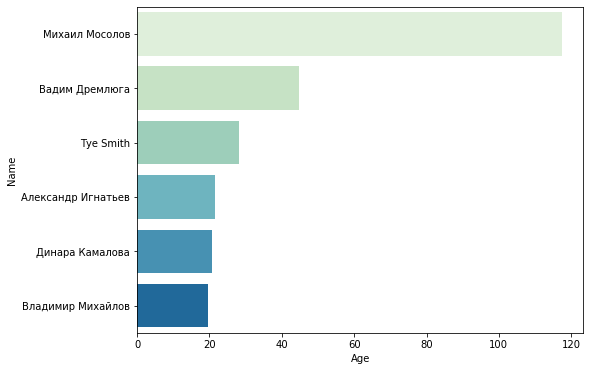

In [284]:
sns.barplot(x = top_ages, y = top_ages_names, palette="GnBu", orient="h");
data.sort_values('Age', ascending = False)[:6][['Name', 'Age']]
# 6 Самых возрастных друзей

Как можно видеть, возраст Михаила повлиял на значение среднего арифметического, так как всего лишь у 5 человек (включая его) указанный возраст превышает 20 лет

###### Медианный возраст друзей моих друзей

In [137]:
top_f_ages = data.sort_values('Friends age', ascending = False)[:10]['Friends age']
top_f_ages_names = data.sort_values('Friends age', ascending = False)[:10]['Name']

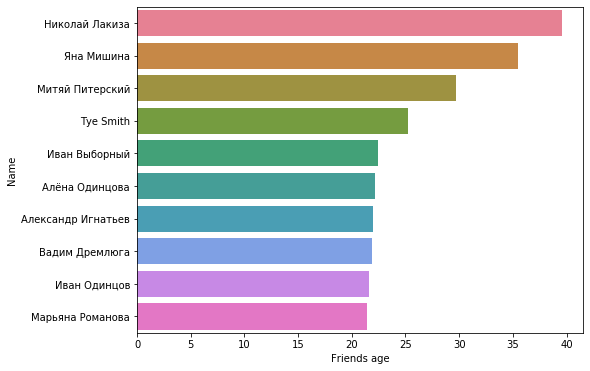

In [285]:
sns.barplot(x = top_f_ages, y = top_f_ages_names, palette="husl", orient="h");
# 10 человек с наивысшим средним уровнем возраста друзей

Наибольший медианный возраст друзей, как ни странно, у моего папы :)

In [139]:
df = data[data['Age'] > 0][['Name', 'Age', 'Friends age']]

In [140]:
delta_ages = df['Friends age'] - df['Age']
df['Delta'] = delta_ages
df = df.sort_values(by=['Delta'])

In [141]:
delta = df['Delta'][2:]
delta_names = df['Name'][2:]

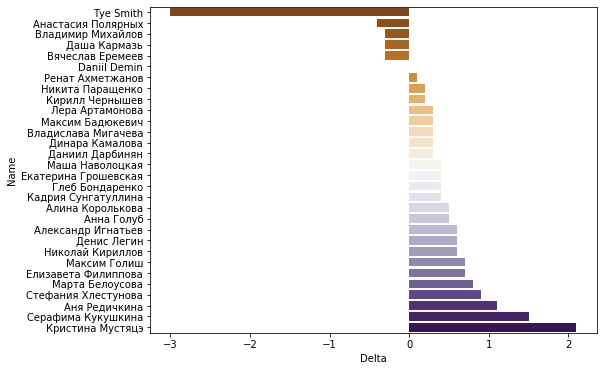

In [286]:
sns.barplot(x = delta, y = delta_names, palette="PuOr", orient="h");
# Разница между возрастом и возрастом друзей

Для красоты картины я исключил значения для Михаила Мосолова и Вадима Дремлюги. Они были равны -98.5 и -22.9 соответственно

### Города: родные и нынешние

In [143]:
data[['City', 'Hometown']].count()

City        75
Hometown    42
dtype: int64

У 75 человек из 98 указан нынешний город, в то время как родной указан у 42-х

In [144]:
data['Hometown'].unique()

array([nan, 'Оленегорск', 'Мурманск', 'Оренбург', 'Тюмень',
       'Cеверодвинск', 'Киров', 'Ижевск', 'Уфа', 'Рязань', 'Кировск',
       'Murmansk', 'Миасс', 'Москва', 'Волгоград', 'Ташкент',
       'Владивосток', 'МурМанск', 'Сургут', 'Калуга', 'Саратов'],
      dtype=object)

In [145]:
data['City'].unique()

array(['Санкт-Петербург', 'Мурманск', 'Калининград', nan, 'Севастополь',
       'Москва', 'Rovaniemi', 'Оренбург', 'Волгоград', 'Киров', 'Кировск',
       'Bern', 'Kirkenes', 'Пенза', 'Королёв', 'Los Angeles'],
      dtype=object)

In [146]:
# Фиксим названия для улучшения статистики
data.loc[33, 'Hometown'] = 'Мурманск'
data.loc[66, 'Hometown'] = 'Мурманск'

In [147]:
hometowns = list(data['Hometown'].dropna())
cities = list(data['City'].dropna())
places = hometowns + cities
places = list(set(places))
len(places)

27

In [148]:
hometown_n = []
city_n = []
for i in range(len(places)):
    hometown_n.append(hometowns.count(places[i]))
    city_n.append(cities.count(places[i]))

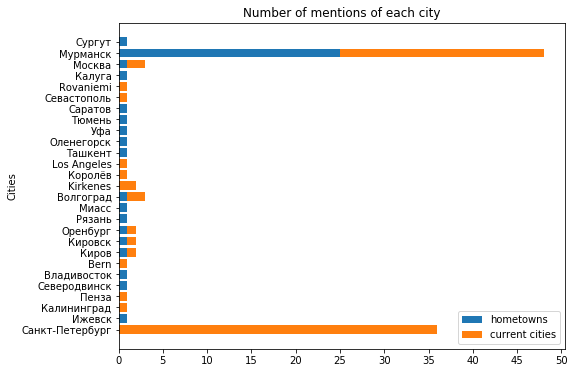

In [287]:
N = len(places)
ind = np.arange(N)

width = 0.55

p1 = plt.barh(ind, hometown_n, height = .8)
p2 = plt.barh(ind, city_n, height = .8, left=hometown_n)

plt.ylabel('Cities')
plt.title('Number of mentions of each city')
plt.yticks(ind, places)
plt.xticks(np.arange(0, 51, 5))
plt.legend((p1[0], p2[0]), ('hometowns', 'current cities'), handlelength=2)

plt.show;
# Какие города и сколько раз указаны

Посмотрим на людей, у кого заполнены оба поля с городами и у кого из них эти поля отличаются

In [254]:
df = data.loc[(~data['Hometown'].isnull()) & (~data['City'].isnull())]
df[df['Hometown'] != df['City']]

,Name,Id,Sex,Age,Friends age,City,Hometown,Friends count,Groups count,Followers count,Profile photos count,Insta,Twitter,University,Time in vk,Time in vk (days)
5,Лена Лакиза,55514851,F,NaN,21.1,Мурманск,Оленегорск,51,26.0,193.0,22,No,No,"МАГУ (бывш. МГГУ, МГПУ)",10.6,3854
7,Иван Парфиров,59280283,M,NaN,19.2,Севастополь,Мурманск,380,91.0,138.0,1,No,No,NaN,10.5,3825
8,Динара Камалова,62039402,F,20.7,21.0,Москва,Мурманск,182,NaN,197.0,12,Yes,No,РТУ МИРЭА,10.4,3805
10,Татьяна Зимина,68733994,F,NaN,20.1,Санкт-Петербург,Мурманск,290,NaN,146.0,9,No,No,NaN,10.3,3757
12,Кирилл Иванов,72184009,M,NaN,19.9,Санкт-Петербург,Мурманск,283,173.0,486.0,19,No,No,ГУМРФ им. адмирала С. О. Макарова,10.2,3735
13,Егор Кондрашов,74008457,M,NaN,19.2,Санкт-Петербург,Тюмень,72,41.0,77.0,1,No,No,Университет ИТМО,10.2,3722
14,Дарья Плотская,78105353,F,NaN,19.1,Санкт-Петербург,Cеверодвинск,191,132.0,261.0,5,Yes,No,Университет ИТМО,10.1,3698
23,Алёна Одинцова,106247308,F,NaN,22.2,Санкт-Петербург,Ижевск,808,171.0,717.0,19,No,No,Университет ИТМО,9.5,3487
26,Алёна Луцкович,127457239,F,NaN,19.2,Санкт-Петербург,Уфа,163,88.0,67.0,28,No,No,Университет ИТМО,9.3,3395
27,Олег Лайок,127923722,M,NaN,19.2,Санкт-Петербург,Рязань,155,NaN,68.0,3,No,No,Университет ИТМО,9.3,3393


Взглянем теперь на то, откуда и куда чаще всего переезжали

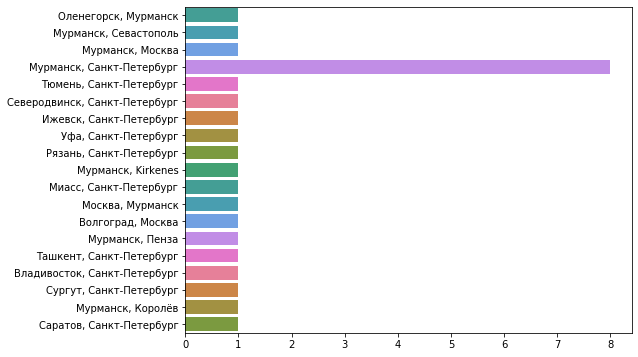

In [288]:
import collections

hts = list(df[df['Hometown'] != df['City']]['Hometown'])
cts = list(df[df['Hometown'] != df['City']]['City'])
pairs = list(zip(hts,cts))
pairs_count = dict(collections.Counter(pairs))
pairs_count_names = [str(list(pairs_count.keys())[i][0] + ', ' + list(pairs_count.keys())[i][1]) for i in range(len(list(pairs_count.keys())))]
pairs_count_n = list(pairs_count.values())

sns.barplot(y = pairs_count_names, x = pairs_count_n, palette=sns.husl_palette(10, h=.5), orient="h");
# Все "переезды"

Самым популярным переездом предсказуемо стал "Мурманск -> Санкт-Петербург"

### Ссылки на иные соцсети

In [151]:
data['Insta'].value_counts()

No     80
Yes    18
Name: Insta, dtype: int64

In [152]:
data['Twitter'].value_counts()

No     97
Yes     1
Name: Twitter, dtype: int64

In [153]:
data.loc[data['Twitter'] == 'Yes']

,Name,Id,Sex,Age,Friends age,City,Hometown,Friends count,Groups count,Followers count,Profile photos count,Insta,Twitter,University
60,Иван Шойтов,209663674,M,NaN,20.0,Санкт-Петербург,Мурманск,267,86.0,NaN,2,Yes,Yes,СПбГУТ им. Бонч-Бруевича


In [154]:
data.loc[data['Insta'] == 'Yes']

,Name,Id,Sex,Age,Friends age,City,Hometown,Friends count,Groups count,Followers count,Profile photos count,Insta,Twitter,University
8,Динара Камалова,62039402,F,20.7,21.0,Москва,Мурманск,182,NaN,197.0,12,Yes,No,РТУ МИРЭА
14,Дарья Плотская,78105353,F,NaN,19.1,Санкт-Петербург,Cеверодвинск,191,132.0,261.0,5,Yes,No,Университет ИТМО
28,Кирилл Чернышев,135720865,M,18.7,18.9,Мурманск,Мурманск,81,80.0,82.0,11,Yes,No,"МАГУ (бывш. МГГУ, МГПУ)"
34,Дарья Кравченко,139315639,F,NaN,20.8,Мурманск,Мурманск,107,17.0,357.0,3,Yes,No,ЯрГУ им. П. Г. Демидова
37,Александра Романий,146193116,F,NaN,19.2,Мурманск,NaN,245,89.0,87.0,7,Yes,No,NaN
39,Вика Пархонина,154467690,F,NaN,19.8,NaN,NaN,156,141.0,1026.0,10,Yes,No,NaN
42,Yulia Brayko,156353509,F,NaN,19.6,NaN,NaN,159,3.0,503.0,3,Yes,No,РГПУ им. А. И. Герцена
43,Лина Трушева,157155316,F,NaN,18.9,Санкт-Петербург,NaN,131,115.0,141.0,7,Yes,No,Университет ИТМО
44,Николай Кириллов,157650866,M,19.2,19.8,NaN,NaN,190,18.0,97.0,5,Yes,No,Университет ИТМО
45,Елизавета Филиппова,160355851,F,18.4,19.1,Санкт-Петербург,Мурманск,319,131.0,186.0,10,Yes,No,СПбГЭУ


### Когда люди регистрировались?

Добавим в датасет столбец с "возрастом" страниц пользователей

In [54]:
sign_up_date = ['22.11.2007', '21.12.2007', '21.01.2008', '16.03.2008', '17.04.2008', '31.10.2009', '27.11.2009', '29.11.2009', \
                '19.12.2009', '05.01.2010', '05.02.2010', '24.02.2010', '27.02.2010', '12.03.2010', '05.04.2010', \
                '09.06.2010', '15.06.2010', '02.07.2010', '22.07.2010', '07.08.2010', '05.09.2010', '25.09.2010', '24.10.2010', \
                '02.11.2010', '22.11.2010', '18.01.2011', '02.02.2011', '04.02.2011', '17.04.2011', '18.04.2011', \
                '23.04.2011', '29.04.2011', '16.05.2011', '31.05.2011', '20.06.2011', '22.07.2011', '14.08.2011', '07.09.2011', \
                '07.10.2011', '23.11.2011', '25.11.2011', '25.11.2011', '17.12.2011', '26.12.2011', '30.12.2011', '17.01.2012', \
                '27.03.2012', '18.04.2012', '26.05.2012', '13.06.2012', '16.06.2012', '16.09.2012', '09.10.2012', '17.12.2012', \
                '08.01.2013', '27.01.2013', '21.02.2013', '09.03.2013', '23.03.2013', '20.04.2013', '26.04.2013', '24.05.2013', \
                '18.06.2013', '22.08.2013', '27.10.2013', '19.01.2014', '20.04.2014', '19.05.2014', '19.05.2014', '27.05.2014', \
                '28.07.2014', '03.08.2014', '12.09.2014', '01.11.2014', '20.01.2015', '05.04.2015', '23.07.2015', '12.08.2015', \
                '09.10.2015', '12.12.2015', '01.03.2016', '02.04.2016', '01.06.2016', '29.06.2016', '15.08.2016', '27.08.2016', \
                '11.01.2017', '27.01.2017', '29.01.2017', '31.01.2017', '16.06.2017', '10.08.2017', '23.08.2017', '30.09.2017', \
                '06.04.2018', '06.08.2018', '01.10.2019', '19.02.2020']

In [55]:
import datetime as dt
today = dt.datetime.today()
time_in_vk = []

for i in range(len(sign_up_date)):
    each = dt.datetime.strptime(sign_up_date[i], "%d.%m.%Y")
    time_in_vk.append(round(((today - each).days/365.25),1))

In [56]:
data['Time in vk'] = time_in_vk

Мы можем посмоотреть на возраст людей, когда они регистрировали свою страницу в вк (только у тех, у кого указана дата)

In [57]:
df = data[data['Age'] > 0][['Name', 'Age', 'Time in vk']]
delta_ages = df['Age'] - df['Time in vk']
df['Age when sign up'] = delta_ages
df = df.sort_values(by=['Age when sign up'])

In [58]:
low_ages = df['Age when sign up'][:5]
low_ages_names = df['Name'][:5]

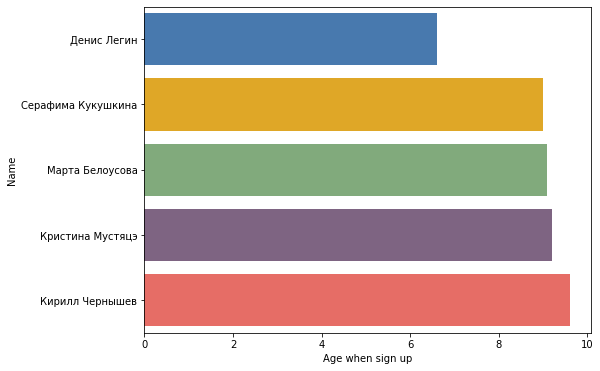

In [59]:
colors = ["windows blue", "amber", "faded green", "dusty purple", "coral"]
sns.barplot(x = low_ages, y = low_ages_names, palette=sns.xkcd_palette(colors), orient="h");
# 5 человек, зарегистрировавшихся в вк, моложе всех

Добавим также и столбец с возрастом страницы в днях

In [60]:
time_in_vk_days = []

for i in range(len(sign_up_date)):
    each = dt.datetime.strptime(sign_up_date[i], "%d.%m.%Y")
    time_in_vk_days.append((today - each).days)

In [61]:
data['Time in vk (days)'] = time_in_vk_days

In [62]:
top_avas = data.sort_values('Profile photos count', ascending = False)[:10]['Profile photos count']
top_avas_names = data.sort_values('Profile photos count', ascending = False)[:10]['Name']

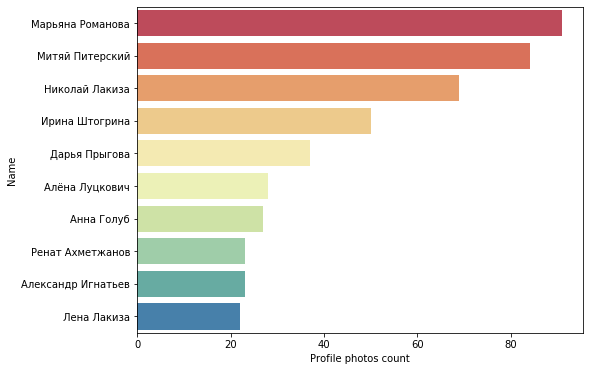

In [63]:
sns.barplot(x = top_avas, y = top_avas_names, palette=sns.color_palette("Spectral", 10), orient="h");
# 10 человек с наибольшим кол-вом фотографий профиля

Обратите внимание,что далее FC - Friends count,
GC - Groups count,
PPC - profile phots count

In [64]:
avas = list(round(data['Time in vk (days)'] / data['Profile photos count'], 1))
data['PPC per days'] = avas

In [65]:
df = data.sort_values(by=['PPC per days'])

top_avas = df[:10]['PPC per days']
top_avas_names = df[:10]['Name']

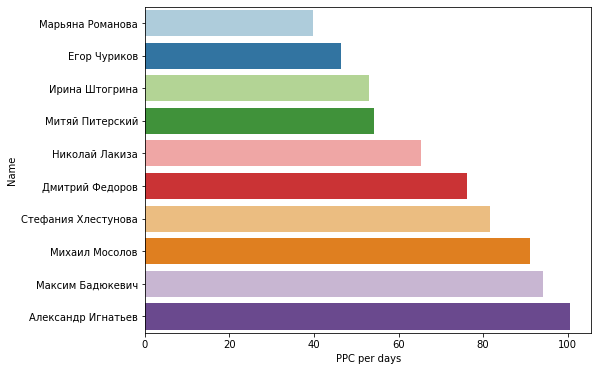

In [66]:
sns.barplot(x = top_avas, y = top_avas_names, palette=sns.color_palette("Paired"), orient="h");
# 10 человек, которые меняют аватарку чаще всех

In [67]:
df = data.replace([np.inf, -np.inf], np.nan)
round(df['PPC per days'].median(), 1)

421.2

In [68]:
round(df['PPC per days'].mean(), 1)

805.2

Для сравнения, моя нынешняя страница активна 1436 дней, и я меняю фото профиля в среднем раз в 359 дней

In [69]:
groups = list(round(data['Time in vk (days)'] / data['Groups count'], 1))
data['GC per days'] = groups

friends = list(round(data['Time in vk (days)'] / data['Friends count'], 1))
data['FC per days'] = friends

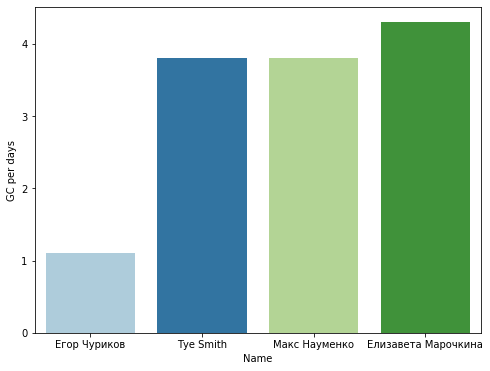

In [70]:
df = data.sort_values(by=['GC per days'])

top_grps = df[:4]['GC per days']
top_grps_names = df[:4]['Name']

sns.barplot(y = top_grps, x = top_grps_names, palette=sns.color_palette("Paired"), orient="v");
# 4 человека, которые вступают в новые группы чаще всех

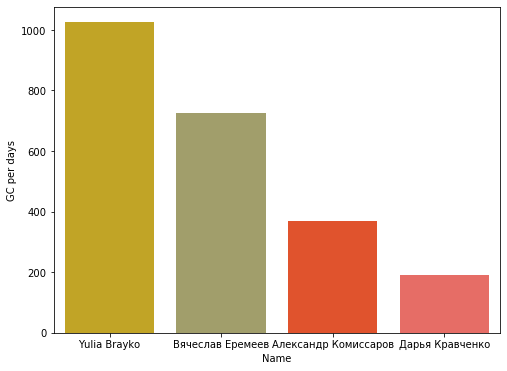

In [71]:
df = df.sort_values(by=['GC per days'], ascending = False)
df

bot_grps = df[:4]['GC per days']
bot_grps_names = df[:4]['Name']

colors = ['gold', 'khaki', 'orangered', 'coral']

sns.barplot(y = bot_grps, x = bot_grps_names, palette=sns.xkcd_palette(colors), orient="v");
# 4 человека, которые вступают в новые группы реже всех

In [72]:
data = data.replace([np.inf, -np.inf], np.nan)

In [73]:
fc_mean = round(data['FC per days'].mean(), 1)
fc_median = round(data['FC per days'].median(), 1)

gc_mean = round(data['GC per days'].mean(), 1)
gc_median = round(data['GC per days'].median(), 1)

means = [fc_mean, gc_mean]
medians = [fc_median, gc_median]

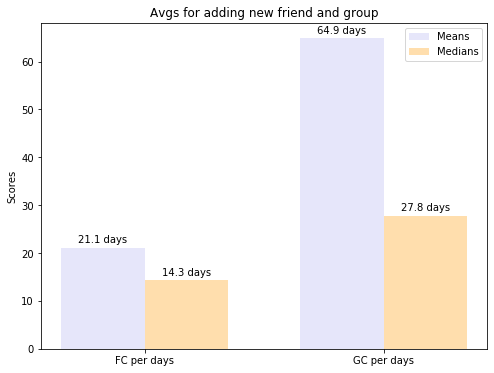

In [76]:
labels = ['FC per days', 'GC per days']

width = 0.35
x = np.arange(len(labels))

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, means, width, label='Means', color = 'lavender')
rects2 = ax.bar(x + width/2, medians, width, label='Medians', color = 'navajowhite')

ax.set_ylabel('Scores')
ax.set_title('Avgs for adding new friend and group')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{} days'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

plt.show;
# Как часто в среднем мои друзья добавляют к себе новых друзей и как часто они в среднем вступают в новые группы

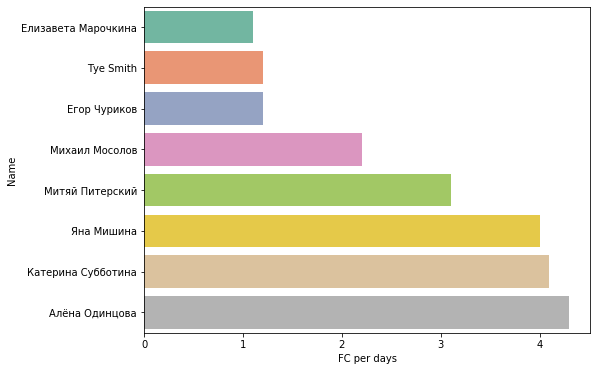

In [305]:
df = data.sort_values(by=['FC per days'])

top_grps = df[:8]['FC per days']
top_grps_names = df[:8]['Name']

sns.barplot(x = top_grps, y = top_grps_names, palette=sns.color_palette("Set2"), orient="h");
# 8 человек, которые добавляют в друзья чаще других

In [77]:
del data['PPC per days']
del data['GC per days']
del data['FC per days']

### Попробуем поискать линейные зависимости у числовых характеристик страниц

Вырезка из моей домашки:
> Вы должны были обратить внимание, что увеличилось необходимое число итераций для сходимости алгоритма. Одним из способов повлиять на это является нормализация признаков. Мы будем использовать один из самых простых и распространенных способов нормализации - Standart Scaling (Z-score normalization):

$$x' = \frac{x - \overline{x}}{\sigma_x}$$

> Замечание: Про важность нормализации признаков можно почитать [тут](https://www.robertoreif.com/blog/2017/12/16/importance-of-feature-scaling-in-data-modeling-part-1-h8nla) и [тут](http://sebastianraschka.com/Articles/2014_about_feature_scaling.html#z-score-standardization-or-min-max-scaling).

>Еще одним из распространенных методов нормализации является min-max нормализация:

$$x' = \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [247]:
def z_scaler(feature):
    return (feature - feature.mean()) / feature.std()

In [248]:
def min_max(feature):
    max_f = np.max(feature)
    min_f = np.min(feature)
    return (feature - min_f)/(max_f - min_f)

###### Распределение количества друзей к дням:

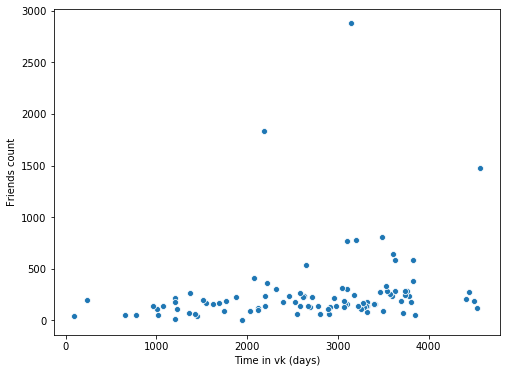

In [192]:
sns.scatterplot(x=data['Time in vk (days)'], y=data['Friends count']);

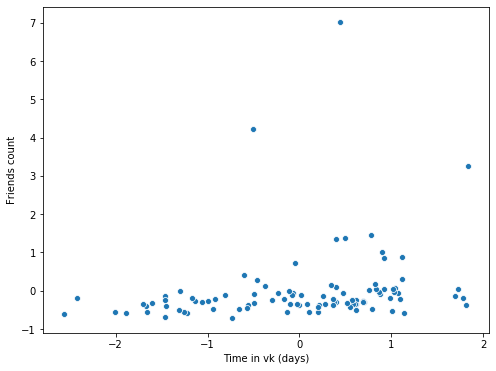

In [193]:
sns.scatterplot(x=(z_scaler(data['Time in vk (days)'])), y=(z_scaler(data['Friends count'])));

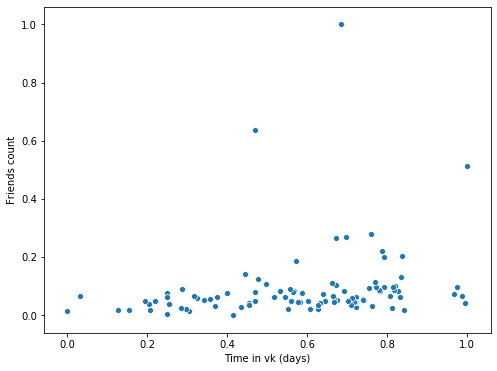

In [194]:
sns.scatterplot(x=(min_max(data['Time in vk (days)'])), y=(min_max(data['Friends count'])));

###### Посмотрим на расределение количества групп к дня:

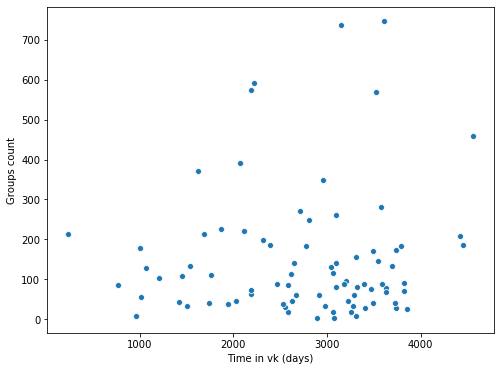

In [195]:
sns.scatterplot(x=data['Time in vk (days)'], y=data['Groups count']);

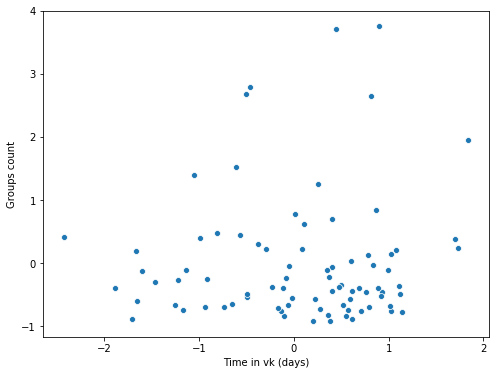

In [196]:
sns.scatterplot(x=(z_scaler(data['Time in vk (days)'])), y=(z_scaler(data['Groups count'])));

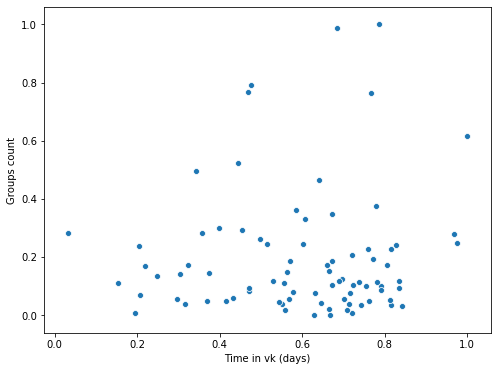

In [198]:
sns.scatterplot(x=(min_max(data['Time in vk (days)'])), y=(min_max(data['Groups count'])));

###### Распределение количества аватарок к дням:

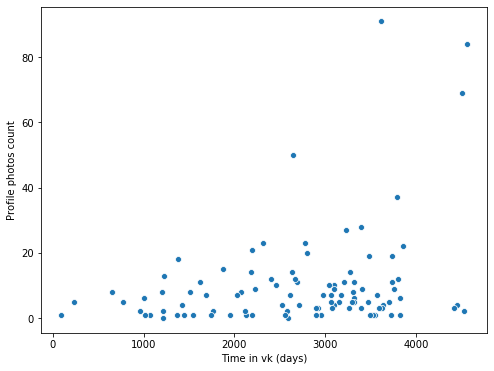

In [200]:
sns.scatterplot(x=data['Time in vk (days)'], y=data['Profile photos count']);

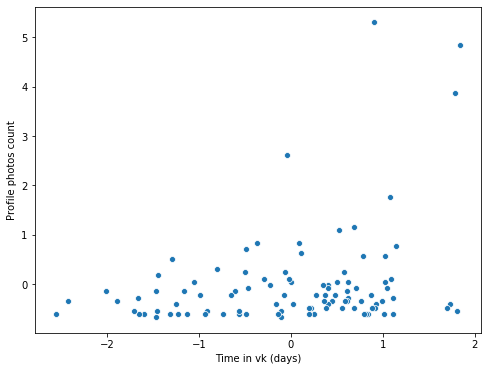

In [201]:
sns.scatterplot(x=(z_scaler(data['Time in vk (days)'])), y=(z_scaler(data['Profile photos count'])));

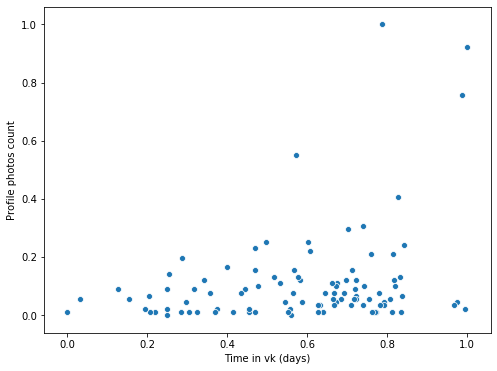

In [202]:
sns.scatterplot(x=(min_max(data['Time in vk (days)'])), y=(min_max(data['Profile photos count'])));

С виду кажется, что линейная зависимость может быть между количеством аватарок и количеством друзей

In [207]:
friends_count = data[data['Friends count'] < 1000]['Friends count']
avatars_count = data[data['Friends count'] < 1000]['Profile photos count']

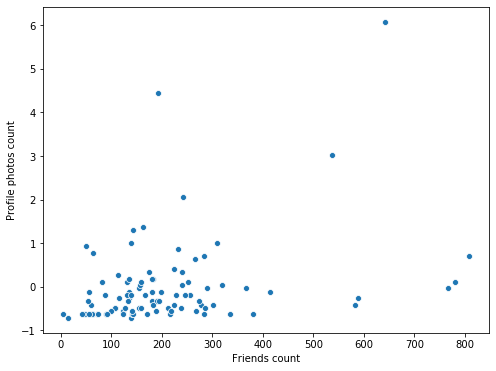

In [246]:
sns.scatterplot(x=friends_count, y=z_scaler(avatars_count));

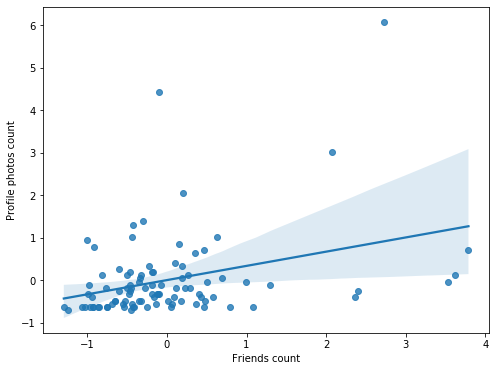

In [210]:
sns.regplot(x=(z_scaler(friends_count)), y=(z_scaler(avatars_count)));

Но взглянув ближе, становится ясно, что и тут линейной зависимости не будет 

### Закончим вузами

In [233]:
import collections
uniki = data['University'].dropna()
uniki
universities = dict(collections.Counter(uniki))
unik_names = list(universities.keys())
unik_count = list(universities.values())

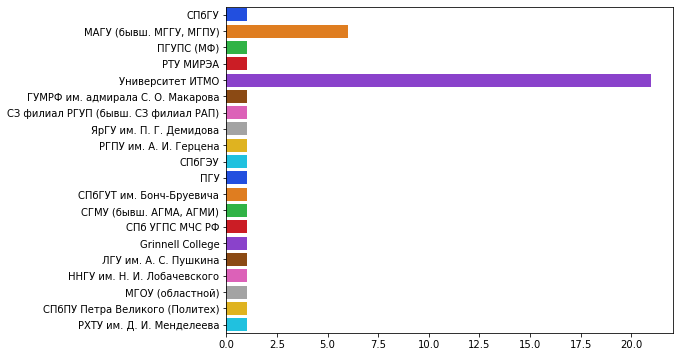

In [239]:
sns.barplot(x = unik_count, y = unik_names, palette=sns.color_palette("bright", 10), orient="h");

Тут без сюрпризов)

## Сам датасет целиком

In [243]:
pd.set_option('display.max_rows', 100)

In [244]:
data

,Name,Id,Sex,Age,Friends age,City,Hometown,Friends count,Groups count,Followers count,Profile photos count,Insta,Twitter,University,Time in vk,Time in vk (days)
0,Митяй Питерский,3823620,M,NaN,29.7,Санкт-Петербург,NaN,1479,460.0,226.0,84,No,No,СПбГУ,12.5,4563
1,Вадим Дремлюга,4954753,M,44.8,21.9,Мурманск,NaN,123,NaN,NaN,2,No,No,"МАГУ (бывш. МГГУ, МГПУ)",12.4,4534
2,Николай Лакиза,6404136,M,NaN,39.6,Калининград,NaN,193,NaN,158.0,69,No,No,ПГУПС (МФ),12.3,4503
3,Иван Выборный,9869521,M,NaN,22.4,NaN,NaN,278,187.0,361.0,4,No,No,NaN,12.2,4448
4,Денис Легин,11819822,M,18.7,19.3,Санкт-Петербург,NaN,212,209.0,169.0,3,No,No,NaN,12.1,4416
5,Лена Лакиза,55514851,F,NaN,21.1,Мурманск,Оленегорск,51,26.0,193.0,22,No,No,"МАГУ (бывш. МГГУ, МГПУ)",10.6,3854
6,Тоня Калинина,59027264,F,NaN,20.4,Мурманск,Мурманск,589,71.0,340.0,6,No,No,NaN,10.5,3827
7,Иван Парфиров,59280283,M,NaN,19.2,Севастополь,Мурманск,380,91.0,138.0,1,No,No,NaN,10.5,3825
8,Динара Камалова,62039402,F,20.7,21.0,Москва,Мурманск,182,NaN,197.0,12,Yes,No,РТУ МИРЭА,10.4,3805
9,Дарья Прыгова,64123076,F,NaN,19.8,Rovaniemi,NaN,242,183.0,298.0,37,No,No,NaN,10.4,3788
